In [10]:
#IMPORTS
import yfinance as yf
import pandas as pd

## Cleaning and visualizing data 

In [2]:
sp500=yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500
#each row is the price in a single trading day
#open : opening price, high: highest price during the day low: lowest price during the day, close: closing price
#volume: total volume that was traded that day

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,3880790000,0,0
2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,3544410000,0,0
2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,3565810000,0,0


<AxesSubplot:xlabel='Date'>

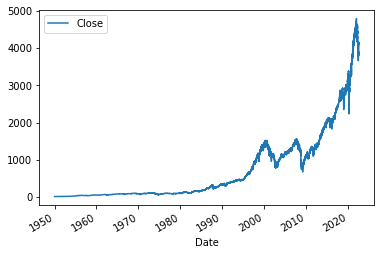

In [4]:
sp500.plot.line(y="Close",use_index=True)

In [5]:
del sp500["Dividends"]
del sp500["Stock Splits"]

## Setting up target

In [7]:
#Tomorrow's price is the closing price of the day after. 
sp500["Tomorrow"] = sp500["Close"].shift(-1) 
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,3880790000,4155.169922
2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,3544410000,4151.939941
2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,3565810000,4145.189941


In [8]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,3880790000,4155.169922,1
2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,3544410000,4151.939941,0
2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,3565810000,4145.189941,0


In [9]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-08-02,4104.209961,4140.470215,4079.810059,4091.189941,3880790000,4155.169922,1
2022-08-03,4107.959961,4167.660156,4107.959961,4155.169922,3544410000,4151.939941,0
2022-08-04,4154.850098,4161.290039,4135.419922,4151.939941,3565810000,4145.189941,0


## Training the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=200,min_samples_split=40,random_state=1)
train = sp500.iloc[:-3000]
test = sp500.iloc[-3000:]
predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors] , train["Target"])

In [ ]:
#Measure how accurate the model is
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds,index=test.index)
print(preds)
precision_score(test["Target"],preds)